# Tutorial: Understanding State Management in NSM

This tutorial explains the concept of **State Management** in Neural State Machines (NSM), a key component that differentiates NSM from traditional architectures.

## Learning Objectives

By the end of this tutorial, you will understand:

1. What state nodes are and their role in NSM
2. How state nodes differ from traditional memory mechanisms
3. How state nodes evolve over time
4. A simple implementation of state management

## What are State Nodes?

In traditional neural networks, information is processed in a feedforward manner with no persistent memory. In contrast, NSM introduces **state nodes** as persistent memory slots that:

- Store long-term context
- Evolve over time through interactions
- Act as a knowledge base for the model

Think of state nodes as a model's "working memory" that persists across processing steps, similar to how humans use working memory to solve complex problems.

## How State Nodes Evolve

State nodes evolve through:

1. **Interactions with Tokens**: Tokens route information to relevant states
2. **State-to-State Propagation**: States communicate and update each other
3. **Layer-wise Updates**: States are updated at each layer of the network

This evolution allows the model to accumulate and refine context over time, enabling complex reasoning.

Let's implement a simple example to see this in action.

In [5]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# For better visualization
import seaborn as sns
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
# Define parameters
num_states = 5
state_dim = 10
num_layers = 4

# Initialize state nodes with random values
states = torch.randn(num_states, state_dim)

print(f"Initialized {num_states} state nodes with dimension {state_dim}.")
print("\nInitial states:")
print(states)

Initialized 5 state nodes with dimension 10.

Initial states:
tensor([[ 1.1369, -0.2079, -1.3701, -0.4405,  0.4927,  0.3082, -0.0869, -1.0994,
         -0.2876, -0.0757],
        [ 1.7849,  0.2685, -1.2876,  1.9858,  0.6710, -2.3830, -1.0416,  1.0620,
         -1.8037,  0.2513],
        [ 0.3509, -0.5060, -1.2653,  0.3082, -1.0527,  0.1006,  1.0889,  1.4536,
         -0.3558,  0.3858],
        [-1.2076,  1.0618, -0.6237, -1.1153,  0.3122,  3.1778, -0.9978,  1.1213,
          1.4502,  2.0025],
        [ 0.2537,  0.1747, -0.9197,  1.5551,  1.6503,  2.6917, -0.1118, -1.8529,
          0.5447,  0.3136]])


In [7]:
# Simulate state evolution over layers

# Store history for visualization
state_history = [states.clone()]

# Simple evolution rule: Add small random updates
for layer in range(num_layers):
    # In a real NSM, this update would be more complex and data-driven
    update = 0.1 * torch.randn(num_states, state_dim)
    states = states + update
    state_history.append(states.clone())
    
print(f"State evolution over {num_layers} layers completed.")
print("\nFinal states:")
print(states)

State evolution over 4 layers completed.

Final states:
tensor([[ 1.1503,  0.2341, -1.3840, -0.4512,  0.6810,  0.4662,  0.1151, -0.9496,
         -0.1541, -0.0223],
        [ 1.9577,  0.8179, -1.2885,  1.7938,  0.8329, -2.3082, -0.8230,  0.8828,
         -1.5401,  0.6631],
        [ 0.2515, -0.3748, -1.0269,  0.4355, -0.9599,  0.4422,  1.1058,  1.3932,
         -0.2469,  0.7058],
        [-1.3095,  1.3344, -0.5736, -1.1307,  0.1301,  3.0146, -0.7774,  1.4192,
          1.6631,  1.7549],
        [ 0.3488,  0.0048, -0.7024,  1.6280,  1.8083,  2.4475,  0.2088, -2.0410,
          0.6120,  0.5011]])


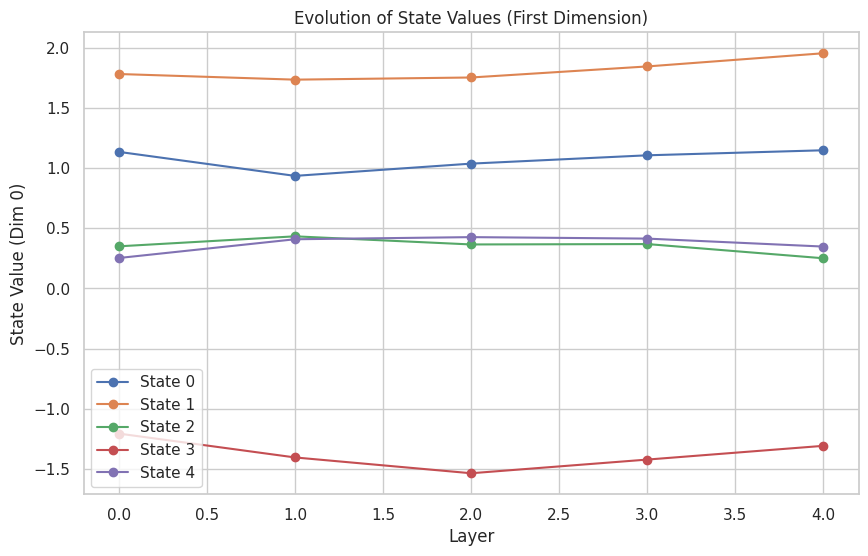

In [8]:
# Visualize state evolution

# Convert history to tensor for easier manipulation
state_history = torch.stack(state_history)

# Plot evolution of the first dimension of each state
plt.figure(figsize=(10, 6))
for i in range(num_states):
    plt.plot(range(num_layers + 1), state_history[:, i, 0], marker='o', label=f'State {i}')

plt.title('Evolution of State Values (First Dimension)')
plt.xlabel('Layer')
plt.ylabel('State Value (Dim 0)')
plt.legend()
plt.grid(True)
plt.show()

## Key Takeaways

1. **State Nodes as Persistent Memory**: Unlike traditional networks, NSM maintains persistent memory through state nodes.
2. **Dynamic Evolution**: State nodes evolve over time, accumulating context.
3. **Scalability**: The number of state nodes is independent of sequence length, enabling efficient processing.

## Next Tutorial

In the next tutorial, we'll explore **Token-to-State Routing**, which determines how tokens interact with state nodes.

See `notebooks/tutorials/routing_mechanism.ipynb` for the next part.